# Problem-2 (Demand Task)

In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

In [2]:
df = pd.read_csv('datasets/Date and model wise sale.csv')

In [3]:
df.shape

(46116, 3)

In [4]:
df.head()

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57


In [5]:
df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

In [15]:
# Adding date features

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [18]:
sell_by_year = df.groupby('year')['Count'].sum()

print(sell_by_year)

year
2014     370989
2015    2024037
2016    2063935
Name: Count, dtype: int64


<AxesSubplot:title={'center':' Total sell throughout 2014-2016'}, xlabel='year', ylabel='count'>

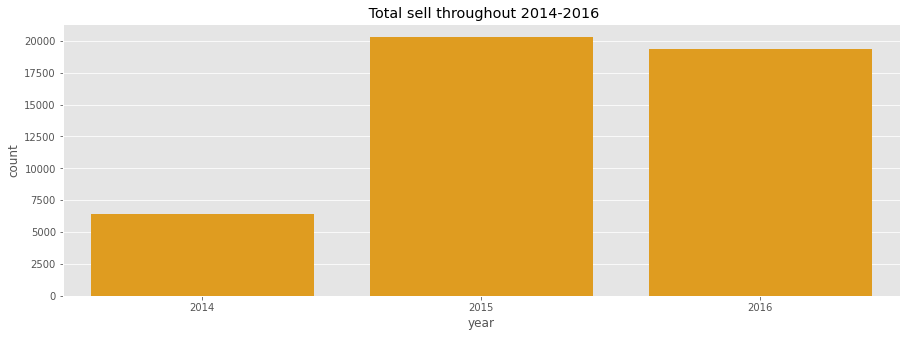

In [22]:
plt.figure(figsize=(15,5))
plt.title(' Total sell throughout 2014-2016')
sns.countplot(x='year', data=df, color='orange')
plt.savefig('plots/total_sell_2014_16.jpg')
plt.show()